# 1. Single qubit unitary operator

In [52]:
import cirq
from cirq import H, SWAP, CZPowGate
from cirq.circuits import InsertStrategy
from qiskit.visualization import plot_histogram





Specify $t$ and $n=$number of qubits

0: ───H──────────────────────────────────────────@─────
                                                 │
1: ───H────────────────────────────────────@─────┼─────
                                           │     │
2: ───H────────────────────────────────@───┼─────┼─────
                                       │   │     │
3: ───H───────────────────────@────────┼───┼─────┼─────
                              │        │   │     │
4: ───H─────────────@─────────┼────────┼───┼─────┼─────
                    │         │        │   │     │
5: ───H───@─────────┼─────────┼────────┼───┼─────┼─────
          │         │         │        │   │     │
6: ───X───@^(7/8)───@^-0.25───@^-0.5───@───@^0───@^0───
|0111001⟩

Counter({28: 1000})

Counter({'011100': 1000})


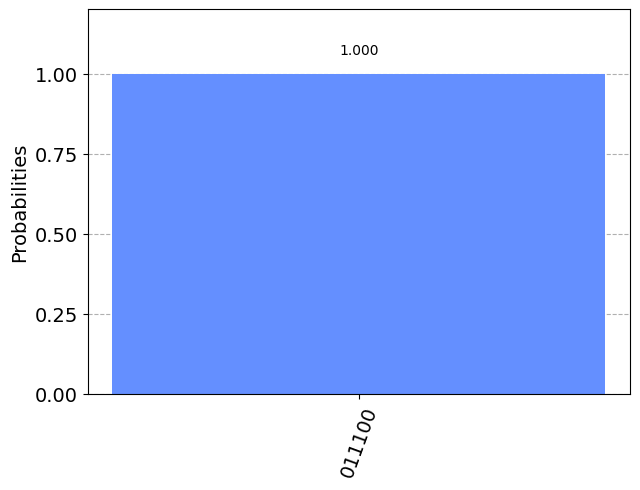

In [63]:
import cirq
from cirq import X, measure

# Create circuit
circuit = cirq.Circuit()

my_phi = 7/16
t = 6 # Number of qubits in the control register             # --------------- Make changes here 

n = 1 # Number of qubits in the register storing eigenvector # --------------- Make changes here 


# ------------------------------------------------------------------------
def CU(power, qcontrol, target):
    circuit = cirq.Circuit()
    
    circuit.append(CZPowGate(exponent = (2*my_phi)*(2**power)).on(qcontrol, *target))
    return circuit

def myInvQFT(qubits):

    circuit = cirq.Circuit() # create a circuit
    
    n = len(qubits)
    
    # swap the qubits
    for j in range(n//2): # integer division
        circuit.append(SWAP.on(qubits[j],qubits[n-j-1]), strategy = InsertStrategy.NEW)
    
    
    # inverted phase gates are applied in reverse order and before the hadamard gate
    
    for i in range(n-1,-1,-1):
        
        phase_divisor = 2**(n-i)
        for j in range(n-1,i,-1):
            circuit.append(CZPowGate(exponent = -2/phase_divisor).on(qubits[j],qubits[i]),
                           strategy = InsertStrategy.NEW)
            phase_divisor = phase_divisor / 2
        
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW) # strategy is for the circuit to look neat
    
    return circuit

# ------------------------------------------------------------------------



# Create t control qubits
control = [cirq.LineQubit(i) for i in range(t) ]

# Create n target qubits
target = [cirq.LineQubit(i) for i in range(t,t+n) ]

# Apply Hadamard gates to the qubits on the first register (control)
circuit.append(cirq.H.on_each(control))

# Set the second register (target) to state |1>  # --------------- Make chnages here 
circuit.append(X.on_each(target))

# apply CU^(2^j) operators
for j in range(t):
    circuit += CU(j, control[t-j-1], target)

# print the circuit before InvQFT
print(circuit)

# the algorithm has been described for the qubit order q0⊗q1⊗q2⊗q3
circuit += myInvQFT(control)

# Measure
circuit.append(measure(*control, key='result'))


# Simulate the circuit
sim = cirq.Simulator()
results_sim = sim.simulate(circuit)
circuit_state = results_sim.dirac_notation()

print(circuit_state) # circuit state

# Execute the circuit
samples = sim.run(circuit, repetitions=1000)
print()
print(samples.histogram(key='result')) # output in decimal form, default in Cirq



# default representation in Cirq is with decimal numbers
# with this function we convert the decimal numbers into binary (bitstrings)
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

print()

temp_2 = samples.histogram(key='result', fold_func=bitstring)
print(temp_2) # output should be {'0101': 1000} => 5 => phi = 5/16

display(plot_histogram(temp_2))

## 1.1 Changing $\phi$ :

In [54]:
import cirq
from cirq import H, SWAP, CZPowGate
from cirq.circuits import InsertStrategy

custom_phi_value = 0.685 # --------------- Make changes here 
custom_phi_value = 0.9921875   # --------------- Make changes here 


def CU(power, qcontrol, target):
    circuit = cirq.Circuit()
    
    circuit.append(CZPowGate(exponent = (2*custom_phi_value)*(2**power)).on(qcontrol, *target))
    return circuit

def myInvQFT(qubits):

    circuit = cirq.Circuit() # create a circuit
    
    n = len(qubits)
    
    # swap the qubits
    for j in range(n//2): # integer division
        circuit.append(SWAP.on(qubits[j],qubits[n-j-1]), strategy = InsertStrategy.NEW)
    
    
    # inverted phase gates are applied in reverse order and before the hadamard gate
    
    for i in range(n-1,-1,-1):
        
        phase_divisor = 2**(n-i)
        for j in range(n-1,i,-1):
            circuit.append(CZPowGate(exponent = -2/phase_divisor).on(qubits[j],qubits[i]),
                           strategy = InsertStrategy.NEW)
            phase_divisor = phase_divisor / 2
        
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW) # strategy is for the circuit to look neat
    
    return circuit

In [55]:
import cirq
from cirq import X, measure

for t in range(1,11):
    
    # Create circuit
    circuit = cirq.Circuit()

    #t = t # Number of qubits in the control register
    n = 1 # Number of qubits in the register storing eigenvector

    # Create t control qubits
    control = [cirq.LineQubit(i) for i in range(t) ]

    # Create n target qubits
    target = [cirq.LineQubit(i) for i in range(t,t+n) ]

    # Apply Hadamard gates to the qubits on the first register (control)
    circuit.append(cirq.H.on_each(control))

    # Set the second register (target) to state |1> 
    circuit.append(X.on_each(target))

    # apply CU^(2^j) operators
    for j in range(t):
        circuit += CU(j, control[t-j-1], target)

    # the algorithm has been described for the qubit order q0⊗q1⊗q2⊗q3
    circuit += myInvQFT(control)

    # Measure
    circuit.append(measure(*control, key='result'))

    # Execute the circuit
    sim = cirq.Simulator()
    samples = sim.run(circuit, repetitions=1000)

    #Most frequent observation
    freq = list(samples.histogram(key='result').keys())[0]
    print(t,": phi is", freq/2**t)

#print(circuit)    

1 : phi is 0.0
2 : phi is 0.0
3 : phi is 0.0
4 : phi is 0.0
5 : phi is 0.0
6 : phi is 0.96875
7 : phi is 0.9921875
8 : phi is 0.9921875
9 : phi is 0.9921875
10 : phi is 0.9921875


# 2. Two-qubit unitary operator:

By using controlled `CZPowGate`, we can obtian a simple two-qubit operator. 

We set $ \phi = 0.31415926535 $. Thus,  $ \vert 11 \rangle $ is an eigenvector with eigenvalue $ \phi $.

In [56]:
import cirq
from cirq import H, SWAP, CZPowGate
from cirq.circuits import InsertStrategy

custom_phi_value = 0.9921875     # --------------- Make changes here 

def CU2(power, qcontrol, target):
    circuit = cirq.Circuit()
    
    circuit.append(CZPowGate(exponent = (2*custom_phi_value)*(2**power)).controlled().on(qcontrol, *target))
    return circuit

def myInvQFT(qubits):

    circuit = cirq.Circuit() # create a circuit
    
    n = len(qubits)
    
    # swap the qubits
    for j in range(n//2): # integer division
        circuit.append(SWAP.on(qubits[j],qubits[n-j-1]), strategy = InsertStrategy.NEW)
    
    
    # inverted phase gates are applied in reverse order and before the hadamard gate
    
    for i in range(n-1,-1,-1):
        
        phase_divisor = 2**(n-i)
        for j in range(n-1,i,-1):
            circuit.append(CZPowGate(exponent = -2/phase_divisor).on(qubits[j],qubits[i]),
                           strategy = InsertStrategy.NEW)
            phase_divisor = phase_divisor / 2
        
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW) # strategy is for the circuit to look neat
    
    return circuit

In [57]:
import cirq
from cirq import X, measure

for t in range(1,15):
    
    # Create circuit
    circuit = cirq.Circuit()

    #t = t # Number of qubits in the control register
    n = 2 # Number of qubits in the register storing eigenvector

    # Create t control qubits
    control = [cirq.LineQubit(i) for i in range(t) ]

    # Create n target qubits
    target = [cirq.LineQubit(i) for i in range(t,t+n) ]

    # Apply Hadamard gates to the qubits on the first register (control)
    circuit.append(cirq.H.on_each(control))

    # Set the second register (target) to state |1> 
    circuit.append(X.on_each(target))

    # apply CU^(2^j) operators
    for j in range(t):
        circuit += CU2(j, control[t-j-1], target)
    
    # the algorithm has been described for the qubit order q0⊗q1⊗q2⊗q3
    circuit += myInvQFT(control)

    # Measure
    circuit.append(measure(*control, key='result'))

    # Execute the circuit
    sim = cirq.Simulator()
    samples = sim.run(circuit, repetitions=1000)

    #Most frequent observation
    freq = list(samples.histogram(key='result').keys())[0]
    print(t,": phi is", freq/2**t)


1 : phi is 0.0
2 : phi is 0.0
3 : phi is 0.0
4 : phi is 0.0
5 : phi is 0.03125
6 : phi is 0.0
7 : phi is 0.9921875
8 : phi is 0.9921875
9 : phi is 0.9921875
10 : phi is 0.9921875
11 : phi is 0.9921875
12 : phi is 0.9921875
13 : phi is 0.9921875
14 : phi is 0.9921875


# 3. Three-qubit unitary operator:

In [33]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)
        

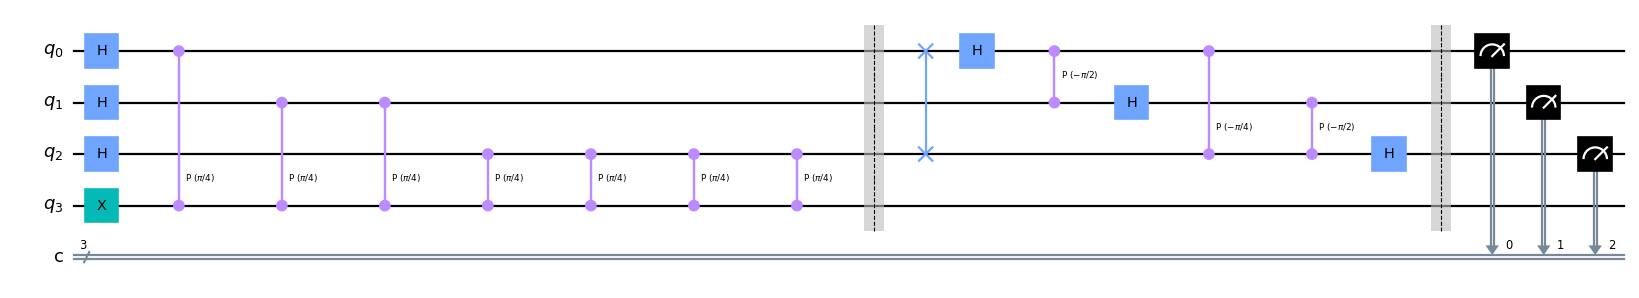

In [36]:


qpe = QuantumCircuit(4, 3)
qpe.x(3)

for qubit in range(3):
    qpe.h(qubit)
    
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2    

qpe.draw("mpl", scale=0.8)

qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
    
qpe.draw("mpl", scale=0.8, fold=False)


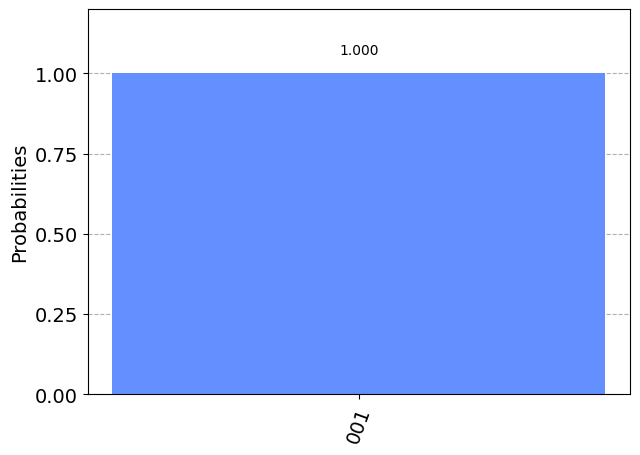

In [37]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1000
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

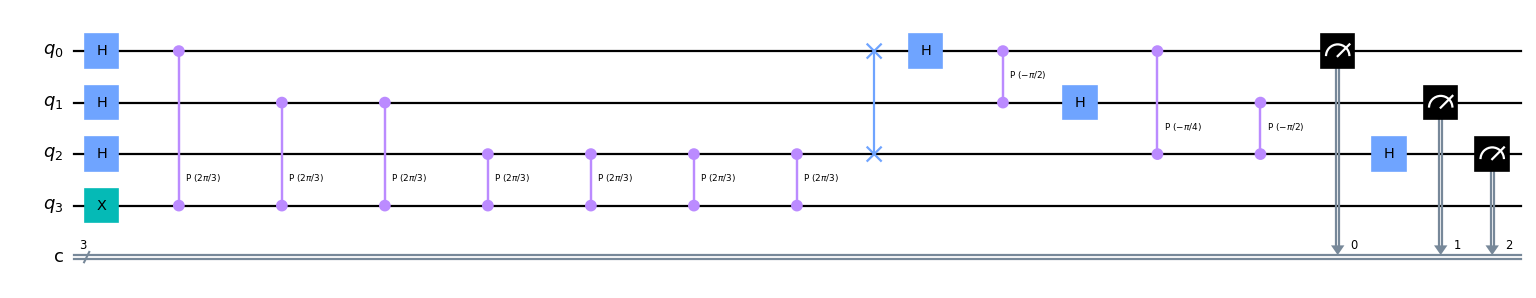

In [39]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw("mpl", scale=0.8, fold=False)

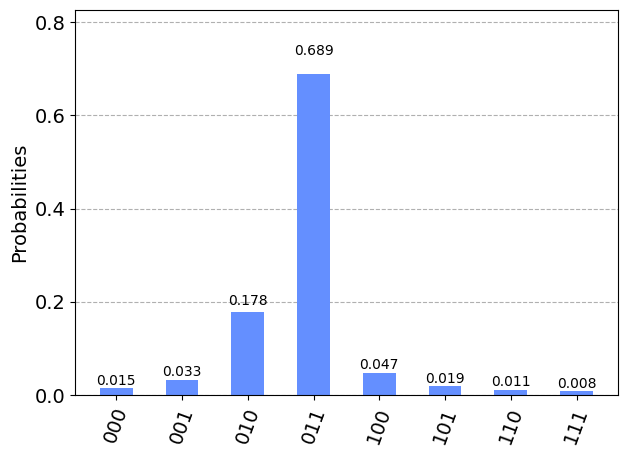

In [40]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

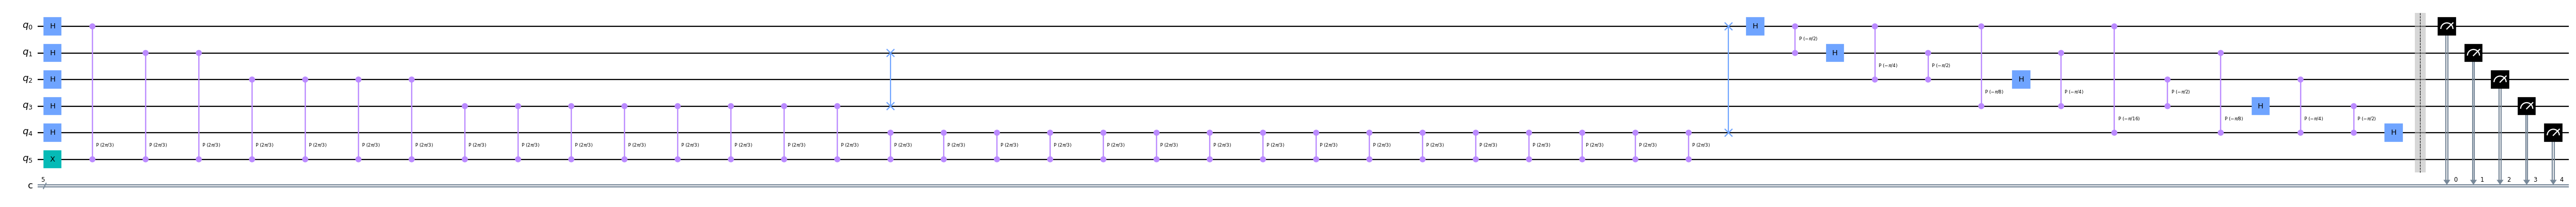

In [42]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw("mpl", scale=0.8, fold=False)

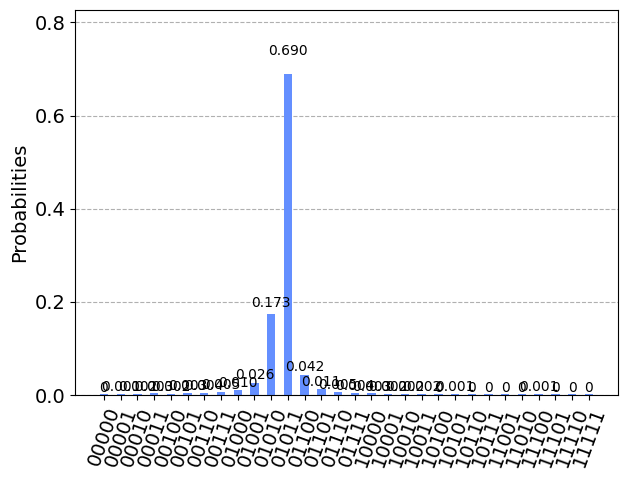

In [43]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
qobj = assemble(t_qpe3, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [51]:
int('11110', 2)

30

In [58]:
bin(28)

'0b11100'

In [62]:
int('11011101',2)

221